In [324]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from svgpath2mpl import parse_path


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

hy=pd.read_csv('hygfull.csv')
n1=pd.read_csv('NOMAD_1.csv')
n2=pd.read_csv('NOMAD_2.csv')
n3=pd.read_csv('NOMAD_3.csv')
n=pd.concat([n1, n2, n3], ignore_index=True)

ng=pd.read_csv('NGC.csv')
ms=pd.read_csv('messier_objects.csv')
cb=pd.read_csv('constellation_borders.csv')
ty=pd.read_csv('tycho_1.csv')

In [326]:
# cb['Constellation'].unique()
# for i in cb['Constellation'].unique():
#     ax.plot(cb[(cb['Constellation']==cb['Constellation'][i])]['RAJ2000'],cb[(cb['Constellation']==cb['Constellation'][i])]['DEJ2000'],color='blue')


In [335]:
def func2(ra,dec,mag,fov):
    
#     x=np.pi/180
# cos(A) = sin(Decl.1)sin(Decl.2) + cos(Decl.1)cos(Decl.2)cos(RA.1 - RA.2); formula for the angular seperation
# distance of each object from user input of ra, dec     
#     ng["distance"]=np.arccos(np.sin(dec*x)*np.sin(ng["_DEJ2000"]*x)+np.cos(dec*x)*np.cos(ng["_DEJ2000"]*x)*np.cos(ra*x-ng["_RAJ2000"]*x))*(180/np.pi)
#     ms["distance"]=np.arccos(np.sin(dec*x)*np.sin(ms["DEJ2000"]*x)+np.cos(dec*x)*np.cos(ms["DEJ2000"]*x)*np.cos(ra*x-ms["RAJ2000"]*x))*(180/np.pi) 
#     ty["distance"]=np.arccos(np.sin(dec*x)*np.sin(ty["_DEJ2000"]*x)+np.cos(dec*x)*np.cos(ty["_DEJ2000"]*x)*np.cos(ra*x-ty["_RAJ2000"]*x))*(180/np.pi) 

# sorting objects under the user input of limiting magnitude; 
# also duplicating the the objects and transforming them so they are repeated to the left of y-axis
    mag_ng = ng[(ng["mag"]<=mag)]
    mag_ms = ms[(ms['V']<=mag)]
    mag_ty = ty[(ty['V']<=mag)]
    dup_ng =  mag_ng.copy(deep=True)
    dup_ms =  mag_ms.copy(deep=True)
    dup_ty =  mag_ty.copy(deep=True)
    dup_ng['_RAJ2000'] -= 360
    dup_ms['RAJ2000'] -= 360 
    dup_ty['_RAJ2000'] -= 360 
    
    fig, ax = plt.subplots(figsize=(40,40))
    
# breathing space aroung the fov circle in the plot
    xl = ra-fov/2-fov/10 
    xr = ra+fov/2+fov/10
    yb = dec-fov/2-fov/10
    yt = dec+fov/2+fov/10
    
# sorting objects in messier_objects.csv according to objects
    cl_ms = ms[(ms["OTYPE_3"]=='OpC')|(ms["OTYPE_3"]=='GlC')|(ms["OTYPE_3"]=='Cl*')]
    pn_ms = ms[(ms["OTYPE_3"]=='PN')]
    ga_ms = ms[(ms["OTYPE_3"]=='G')|(ms["OTYPE_3"]=='Sy2')|(ms["OTYPE_3"]=='IG')|(ms["OTYPE_3"]=='GiG')|(ms["OTYPE_3"]=='GiP')|(ms["OTYPE_3"]=='SyG')|(ms["OTYPE_3"]=='SBG')|(ms["OTYPE_3"]=='BiC')|(ms["OTYPE_3"]=='H2G')]
    re_ms = ms[(ms["OTYPE_3"]=='HII')|(ms["OTYPE_3"]=='As*')|(ms["OTYPE_3"]=='LIN')|(ms["OTYPE_3"]=='mul')|(ms["OTYPE_3"]=='RNe')|(ms["OTYPE_3"]=='AGN')]
# duplicated data sort by object type
    dup_cl_ms = dup_ms[(dup_ms["OTYPE_3"]=='OpC')|(dup_ms["OTYPE_3"]=='GlC')|(dup_ms["OTYPE_3"]=='Cl*')]
    dup_pn_ms = dup_ms[(dup_ms["OTYPE_3"]=='PN')]
    dup_ga_ms = dup_ms[(dup_ms["OTYPE_3"]=='G')|(dup_ms["OTYPE_3"]=='Sy2')|(dup_ms["OTYPE_3"]=='IG')|(dup_ms["OTYPE_3"]=='GiG')|(dup_ms["OTYPE_3"]=='GiP')|(dup_ms["OTYPE_3"]=='SyG')|(ms["OTYPE_3"]=='SBG')|(dup_ms["OTYPE_3"]=='BiC')|(dup_ms["OTYPE_3"]=='H2G')]
    dup_re_ms = dup_ms[(dup_ms["OTYPE_3"]=='HII')|(dup_ms["OTYPE_3"]=='As*')|(dup_ms["OTYPE_3"]=='LIN')|(dup_ms["OTYPE_3"]=='mul')|(dup_ms["OTYPE_3"]=='RNe')|(dup_ms["OTYPE_3"]=='AGN')]
       
    print(f"Observing RA: {ra} deg, DEC: {dec} deg, FoV: {fov} deg, Limiting Magnitude: {mag}") 
    
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', color="#838383")
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
    ax.set_facecolor('#dbdbdb')
    
# if user input ra is nearer to 360 deg, the region near 0 is plotted; here the duplicated and transformed data from above is useful
    if xr>360:
        ra-=360  
        xr-=360
        xl-=360

# scatter messier
    ax.scatter(cl_ms['RAJ2000'],cl_ms['DEJ2000'],color='yellow', marker=cl, s=cl_ms['V']*1000/fov, zorder=2, edgecolor="black", linewidth=40/fov)
    ax.scatter(pn_ms['RAJ2000'],pn_ms['DEJ2000'],color='black', marker=pn4, s=pn_ms['V']*4000/fov, zorder=2)
    ax.scatter(pn_ms['RAJ2000'],pn_ms['DEJ2000'],color='green', marker=cl, s=pn_ms['V']*1000/fov, zorder=3)
    ax.scatter(ga_ms['RAJ2000'],ga_ms['DEJ2000'],color='red', marker=ga, s=ga_ms['V']*1000/fov, zorder=2)
    ax.scatter(re_ms['RAJ2000'],re_ms['DEJ2000'],c='black', edgecolor="white", linewidth=40/fov, label='Stars', s=re_ms['V']*10/fov)
    
# scatter ngc
    ax.scatter(mag_ng['_RAJ2000'], mag_ng['_DEJ2000'], c='black', edgecolor="white", linewidth=40/fov, label='Stars', s=mag_ng['mag']*1000/fov)
    ax.scatter(dup_ng['_RAJ2000'], dup_ng['_DEJ2000'], c='black', edgecolor="white", linewidth=40/fov, label='Stars', s=dup_ng['mag']*1000/fov)
    
# scatter tycho
    ax.scatter(mag_ty['_RAJ2000'], mag_ty['_DEJ2000'], c='black', edgecolor="white", linewidth=40/fov, label='Stars', s=mag_ty['V']*1000/fov)
    ax.scatter(dup_ty['_RAJ2000'], dup_ty['_DEJ2000'], c='black', edgecolor="white", linewidth=40/fov, label='Stars', s=dup_ty['V']*1000/fov)

# constellation borders
    for i in cb['Constellation'].unique():
        ax.scatter(cb[(cb['Constellation']==i)]['RAJ2000'],cb[(cb['Constellation']==i)]['DEJ2000'],color='blue', s=20/fov)

# test markers
#     ax.scatter([10],[40],marker= cl, s=1000)
#     ax.scatter([0],[20+10],marker= cl, s=1000)
#     ax.scatter([0],[20+10],marker= pn4, s=4000)
#     ax.scatter([20],[50],marker= ga, s=10000)
#     ax.scatter([20],[0], edgecolor='white',s=10000, linewidth=200/fov, color='black')
#     ax.scatter([20],[40],marker=pl, s=10000, edgecolor='black', linewidth=0)
#     ax.scatter([0],[50],marker=cp, s=10000, edgecolor='black', linewidth=0, alpha=0.5)
#     ax.scatter([0],[60],marker=pn4, s=100, linewidth=2/fov)

    ax.add_artist(plt.Circle((ra, dec), fov/2, color='#00af08',zorder=-1, alpha=0.1))
    
    
    ax.set_xlim([xl,xr])
    ax.set_ylim([yb,yt])

    ax.set_yticklabels([round(y,2) for y in ax.get_yticks()])
    ax.set_xticklabels([(x+360) if x<0 else round(x,2) for x in ax.get_xticks()])
    
    plt.xlabel('Right Ascension (degrees)', fontsize=16)
    plt.ylabel('Declination (degrees)', fontsize=16)
    
    cst_names=cb['Constellation'].unique()
    cbcx=[]
    cbcy=[]
    for i in cst_names:
        cbcx.append((cb[(cb['Constellation']==i)]['RAJ2000'].min()+cb[(cb['Constellation']==i)]['RAJ2000'].max())/2)
        cbcy.append((cb[(cb['Constellation']==i)]['DEJ2000'].min()+cb[(cb['Constellation']==i)]['DEJ2000'].max())/2)
    
#     for i, txt in enumerate(cb['Constellation']):
#         ax.annotate(txt, xy=(mag_ty['RAJ2000'].values[i],mag_ty['DEJ2000'].values[i]),textcoords='offset points',xytext=(10,10))
    for i, txt in enumerate(cst_names):
        ax.annotate(txt, (cbcx[i], cbcy[i]), xytext=(0, 0), textcoords='offset points', horizontalalignment='center', verticalalignment='center')
        print(txt)
        plt.show()
func2(300,20,4,10)

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Observing RA: 300 deg, DEC: 20 deg, FoV: 10 deg, Limiting Magnitude: 4
Andromeda


Lacerta
Cassiopeia
Perseus
Triangulum
Pisces
Pegasus
Hydra
Antlia
Centaurus
Chamaleon
Apus
Pavo
Ara
Triangulum Australe
Circinus
Musca
Aquila
Aquarius
Sculptor
Pisces Austrinus
Capricornus
Serpens
Ophiucus
Hercules
Sagitta
Delphinus
Sagittarius
Scutum
Norma
Scorpius
Corona Australis
Aries
Taurus
Auriga
Camelopardalis
Lynx
Gemini
Boötes
Virgo
Coma Berenices
Canes Venatici
Ursa Major
Corona Borealis
Caelum
Dorado
Pictor
Columba
Cepheus
Ursa Minor
Draco
Leo
Canis Minor
Cancer
Canis Major
Puppis
Monoceros
Microscopium
Vela
Carina
Crux
Lupus
Cygnus
Cetus
Eridanus
Fornax
Volans
Telescopium
Corvus
Crater
Lyra
Vulpecula
Reticulum
Mensa
Equuleus
Orion
Lepus
Horologium
Hydrus
Phoenix
Grus
Indus
Tucana
Sextans
Libra
Octans
Leo Minor
Pyxis


Objects inside FoV: 68824
Lowest magnitude in the FoV: 10.00
Observing RA: 10 deg, DEC: 40 deg, FoV: 100 deg, Limiting Magnitude: 12


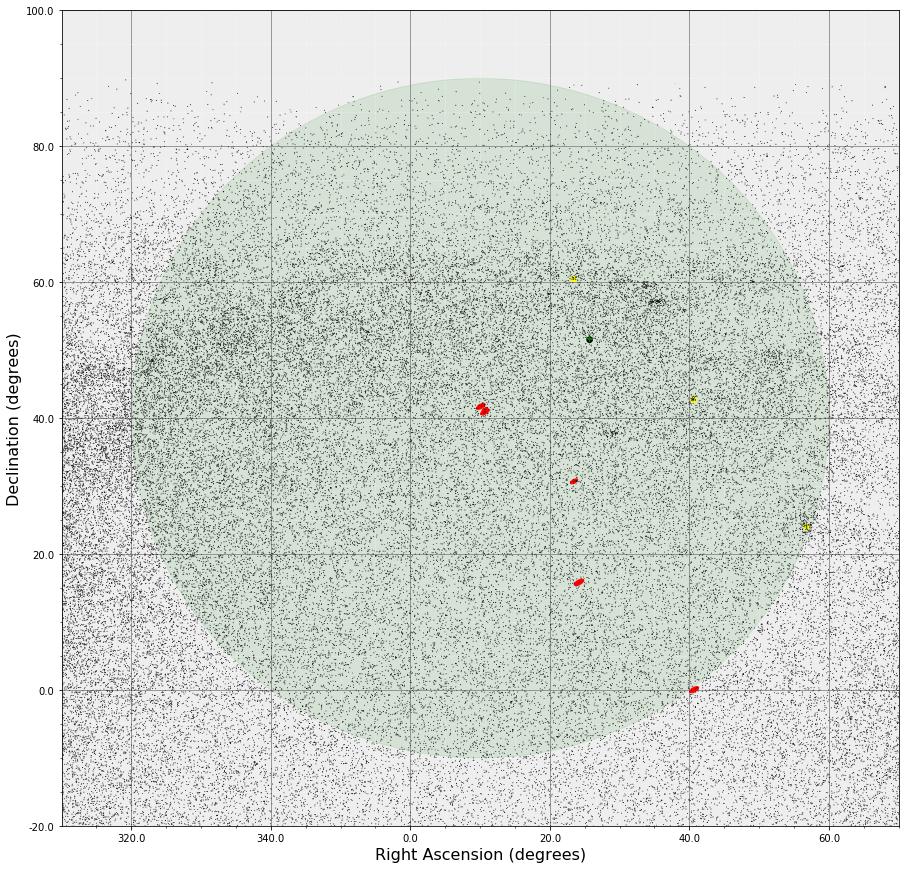

In [180]:
def func2(ra,dec,mag,fov):
    
    x=np.pi/180
    # cos(A) = sin(Decl.1)sin(Decl.2) + cos(Decl.1)cos(Decl.2)cos(RA.1 - RA.2); formula for the angular seperation
    n["distance"]=np.arccos(np.sin(dec*x)*np.sin(n["DEJ2000"]*x)+np.cos(dec*x)*np.cos(n["DEJ2000"]*x)*np.cos(ra*x-n["RAJ2000"]*x))*(180/np.pi)
    n["distance"]=np.arccos(np.sin(dec*x)*np.sin(n["DEJ2000"]*x)+np.cos(dec*x)*np.cos(n["DEJ2000"]*x)*np.cos(ra*x-n["RAJ2000"]*x))*(180/np.pi)

    
    reflY=n.copy(deep=True)
    reflY['RAJ2000'] = reflY['RAJ2000']-360

    mag_n = n[(n["Vmag"]<=mag)]
    mag_refl = reflY[(reflY['Vmag']<=mag)]
    
    fig, ax = plt.subplots(figsize=(15,15))
    
    xl = ra-fov/2-fov/10 
    xr = ra+fov/2+fov/10
    yb = dec-fov/2-fov/10
    yt = dec+fov/2+fov/10
    
#     
    oc_ms= ms[(ms["OTYPE_3"]=='OpC')]
    gc_ms= ms[(ms["OTYPE_3"]=='GlC')]
    pn_ms= ms[(ms["OTYPE_3"]=='PN')]
    ga_ms= ms[(ms["OTYPE_3"]=='G')|(ms["OTYPE_3"]=='Sy2')|(ms["OTYPE_3"]=='IG')|(ms["OTYPE_3"]=='GiG')|(ms["OTYPE_3"]=='GiP')|(ms["OTYPE_3"]=='SyG')|(ms["OTYPE_3"]=='SBG')|(ms["OTYPE_3"]=='BiC')|(ms["OTYPE_3"]=='H2G')]
# 
    
    FoV_obj=n[(n["Vmag"]<=mag) & (n["distance"] <=fov/2)]
    
    print(f"Objects inside FoV: {FoV_obj.shape[0]}\nLowest magnitude in the FoV: {FoV_obj['Vmag'].max():.2f}\nObserving RA: {ra} deg, DEC: {dec} deg, FoV: {fov} deg, Limiting Magnitude: {mag}") 
    
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', color="#838383")
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
    ax.set_facecolor('#eeeeee')
    
    if xr>360:
        ra-=360  
        xr-=360
        xl-=360
    
    ax.scatter(oc_ms['RAJ2000'],oc_ms['DEJ2000'],color='yellow', marker=oc)
    ax.scatter(gc_ms['RAJ2000'],gc_ms['DEJ2000'],color='yellow', marker=gc)
    ax.scatter(gc_ms['RAJ2000'],gc_ms['DEJ2000'],color='black', marker=gc2)
    ax.scatter(pn_ms['RAJ2000'],pn_ms['DEJ2000'],color='black', marker=pn)
    ax.scatter(pn_ms['RAJ2000'],pn_ms['DEJ2000'],color='green', marker=pn2)
    ax.scatter(ga_ms['RAJ2000'],ga_ms['DEJ2000'],color='red', marker=ga, s=ga_ms['V']*1000/fov, zorder=1)
    
    ax.scatter(mag_n['RAJ2000'], mag_n['DEJ2000'], c='black', edgecolor="white", linewidth=2/fov, label='Stars', s=mag_n['Vmag']*10/fov)
    ax.scatter(mag_refl['RAJ2000'], mag_refl['DEJ2000'], c='black', edgecolor="white", linewidth=2/fov, label='Stars', s=mag_refl['Vmag']*10/fov)
    ax.add_artist(plt.Circle((ra, dec), fov/2, color='g',zorder=-1, alpha=0.1))
    
    
    ax.set_xlim([xl,xr])
    ax.set_ylim([yb,yt])

    ax.set_yticklabels([round(y,2) for y in ax.get_yticks()])
    ax.set_xticklabels([(x+360) if x<0 else round(x,2) for x in ax.get_xticks()])
    
    plt.xlabel('Right Ascension (degrees)', fontsize=16)
    plt.ylabel('Declination (degrees)', fontsize=16)
#     for i, txt in enumerate(mag_n['Vmag']):
#         ax.annotate(txt, xy=(mag_n['RAJ2000'].values[i],mag_n['DEJ2000'].values[i]),textcoords='offset points',xytext=(10,10))
    
func2(10,40,12,100)

Objects inside FoV: 1
Lowest magnitude in the FoV: 9.32
Observing RA: 0 deg, DEC: 0 deg
Calculated FoV: 0.5 deg; Limiting magnitude: 12.0


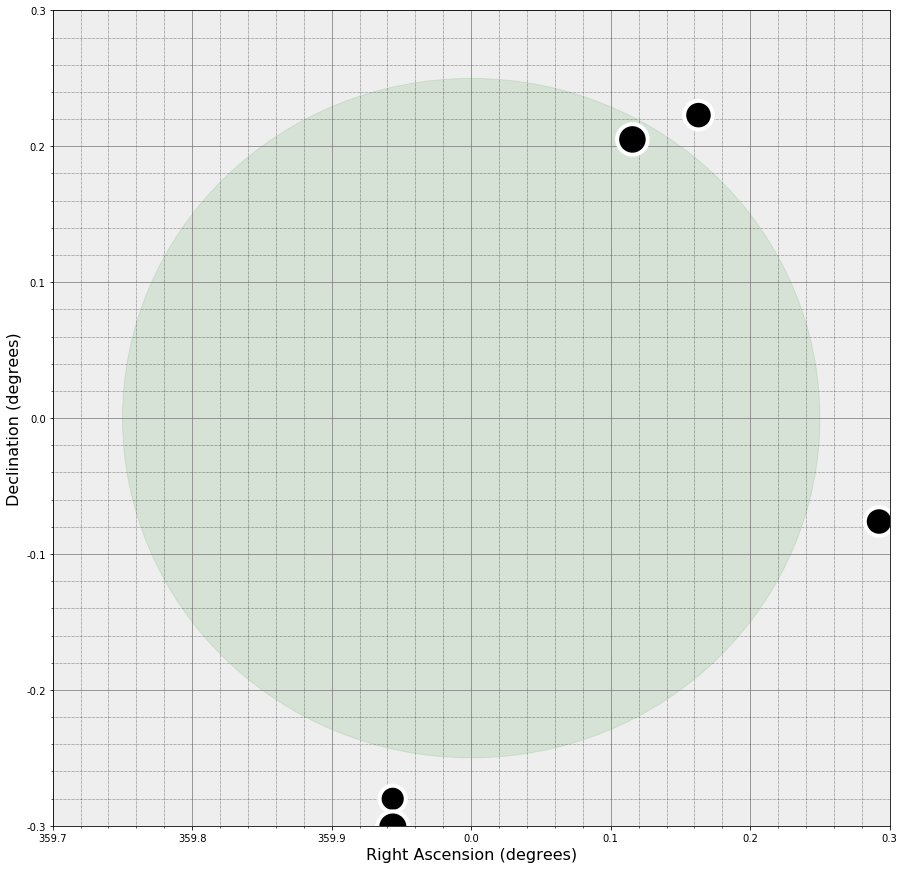

In [135]:
def func1(ra,dec,m,afov,d):
    
    fov=afov/m # true field of view based on magnification and apparent fov of eye piece
    mag=2+5*np.log10(d) # limiting visual magnitude based of aperture
    
    x=np.pi/180
    # cos(A) = sin(Decl.1)sin(Decl.2) + cos(Decl.1)cos(Decl.2)cos(RA.1 - RA.2); formula for the angular seperation
    ng["distance"]=np.arccos(np.sin(dec*x)*np.sin(ng["_DEJ2000"]*x)+np.cos(dec*x)*np.cos(ng["_DEJ2000"]*x)*np.cos(ra*x-ng["_RAJ2000"]*x))*(180/np.pi) mag
    ms["distance"]=np.arccos(np.sin(dec*x)*np.sin(ms["DEJ2000"]*x)+np.cos(dec*x)*np.cos(ms["DEJ2000"]*x)*np.cos(ra*x-ms["RAJ2000"]*x))*(180/np.pi) V
    ty["distance"]=np.arccos(np.sin(dec*x)*np.sin(ty["DEJ2000"]*x)+np.cos(dec*x)*np.cos(ty["DEJ2000"]*x)*np.cos(ra*x-ty["RAJ2000"]*x))*(180/np.pi) V

    reflYng=n.copy(deep=True)
    reflYng['_RAJ2000'] = reflYng['_RAJ2000']-360

    mag_ng = ng[(ng["mag"]<=mag)]
    mag_ms = ms[(ms['V']<=mag)]
    mag_ty = ty[(ty['V']<=mag)]
    dup_ng =  mag_ng(deep=True)
    dup_ms =  mag_ms(deep=True)
    dup_ty =  mag_ty(deep=True)
    dup_ng['_RAJ2000'] -= 360
    dup_ms['RAJ2000'] -= 360 
    dup_ty['RAJ2000'] -= 360 
    
    fig, ax = plt.subplots(figsize=(15,15))
    
    xl = ra-fov/2-fov/10 # -fov/100
    xr = ra+fov/2+fov/10
    yb = dec-fov/2-fov/10
    yt = dec+fov/2+fov/10  
        
    print(f"Lowest magnitude in the FoV: {FoV_obj['Vmag'].max():.2f}\nObserving RA: {ra} deg, DEC: {dec} deg") 
    print(f"Calculated FoV: {fov} deg; Limiting magnitude: {mag}") 
            
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', color="#838383")
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax.set_facecolor('#eeeeee')
    
    if xr>360:
        ra-=360  
        xr-=360
        xl-=360
    
    ax.scatter(mag_ty['RAJ2000'], mag_ty['DEJ2000'], c='black', edgecolor="white", linewidth=2/fov, label='Stars', s=mag_ty['V']*50/fov)
    ax.scatter(mag_refl['RAJ2000'], mag_refl['DEJ2000'], c='black', edgecolor="white", linewidth=2/fov, label='Stars', s=mag_refl['Vmag']*50/fov)
    ax.add_artist(plt.Circle((ra, dec), fov/2, color='g',zorder=-1, alpha=0.1))

    ax.set_xlim([xl,xr])
    ax.set_ylim([yb,yt])

    ax.set_yticklabels([round(y,2) for y in ax.get_yticks()])
    ax.set_xticklabels([(x+360) if x<0 else round(x,2) for x in ax.get_xticks()])

    
    plt.xlabel('Right Ascension (degrees)', fontsize=16)
    plt.ylabel('Declination (degrees)', fontsize=16)
#     for i, txt in enumerate(mag_n['Vmag']):
#         ax.annotate(txt, xy=(mag_n['RAJ2000'].values[i],mag_n['DEJ2000'].values[i]),textcoords='offset points',xytext=(10,10))
    
func1(0,0,20,10,100)

Use the following function to enter any upper magnitude and fov values

function with telescope parameters; m: magnification of telescope; afov: apparent field of view of eyepiece; D: aperture size in mm;

In [246]:
ga = parse_path("""M 490.60742,303.18917 A 276.31408,119.52378 28.9 0 1 190.94051,274.29027 276.31408,119.52378 28.9 0 1 6.8010582,36.113705 276.31408,119.52378 28.9 0 1 306.46799,65.012613 276.31408,119.52378 28.9 0 1 490.60742,303.18917 Z""")
ga.vertices -= ga.vertices.mean(axis=0)
# red

cl = parse_path("""M 541.64941,265.49102 A 270.8247,265.49102 0 0 1 270.82471,530.98205 270.8247,265.49102 0 0 1 0,265.49102 270.8247,265.49102 0 0 1 270.82471,0 270.8247,265.49102 0 0 1 541.64941,265.49102 Z""")
cl.vertices -= cl.vertices.mean(axis=0)
# yellow

pn2 = parse_path("""m 0,326.75709 v 18.09653 h 671.61069 v -18.09653 z m 326.7571,344.85359 h 18.0965 V 0 h -18.0965 z""")
pn2.vertices -= pn2.vertices.mean(axis=0)
# black

pl = parse_path("""m 65.722069,112.42727 v 2.87837 h 2.878368 v 0.87849 h -2.878368 v 2.87837 h -0.868162 v -2.87837 h -2.878368 v -0.87849 h 2.878368 v -2.87837 z""")
pl.vertices -= pl.vertices.mean(axis=0)      

cp = parse_path("""M 749.48177,361.96144 V 387.5203 H 0 V 361.96144 Z M 361.96144,0 h 25.55886 v 749.48177 h -25.55886 z m 239.5511,374.74089 A 226.77166,226.77166 0 0 1 374.74089,601.51254 226.77166,226.77166 0 0 1 147.96923,374.74089 226.77166,226.77166 0 0 1 374.74089,147.96923 226.77166,226.77166 0 0 1 601.51254,374.74089 Z""")
cp.vertices -= cp.vertices.mean(axis=0)  

pn4 = parse_path("""M 488,240 H 256 V 8 c 0,-4.418 -3.582,-8 -8,-8 -4.418,0 -8,3.582 -8,8 V 240 H 8 c -4.418,0 -8,3.582 -8,8 0,4.418 3.582,8 8,8 h 232 v 232 c 0,4.418 3.582,8 8,8 4.418,0 8,-3.582 8,-8 V 256 h 232 c 4.418,0 8,-3.582 8,-8 0,-4.418 -3.582,-8 -8,-8 z""")
pn4.vertices -= pn4.vertices.mean(axis=0) 
